In [1]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

### Задание 1
Решить линейную систему
$\begin{bmatrix} 1 & 2 & 3 \\ 4 & 0 & 6 \\ 7 & 8 & 9 \end{bmatrix} \cdot X = \begin{bmatrix} 12 \\ 2 \\ 1 \end{bmatrix}$

In [2]:
A = np.array([[1, 2, 3], [4, 0, 6], [7, 8, 9]])
B = np.array([12, 2, 1])
np.linalg.solve(A, B)

array([-9.2       ,  0.9       ,  6.46666667])

### Задание 2
Найдите псевдорешение:

x + 2y – z = 1

3x – 4y = 7

8x – 5y + 2z = 12

2x – 5z = 7

11x +4y – 7z = 15

In [3]:
A = np.array([[1, 2, -1], [3, -4, 0], [8, -5, 2], [2, 0, -5], [11, 4, -7]])
B = np.array([1, 7, 12, 7, 15])
np.linalg.lstsq(A, B, rcond=-1)

(array([ 1.13919353, -0.90498444, -0.9009803 ]),
 array([0.71523211]),
 3,
 array([15.2817306 ,  9.59852942,  3.65197794]))

Посмотрим отклонения от реальных значений.

In [4]:
np.dot(A, [ 1.13919353, -0.90498444, -0.9009803 ]) - B

array([-0.76979505,  0.03751835, -0.16349016, -0.21671144,  0.21805317])

### Задание 3
Сколько решений имеет линейная система $\begin{bmatrix} 1 & 2 & 3 \\ 4 & 5 & 6 \\ 7 & 8 & 9 \end{bmatrix} \cdot X = \begin{bmatrix} 12 \\ 2 \\ 1 \end{bmatrix}$

Если ноль – то измените вектор правой части так, чтобы система стала совместной, и решите ее.

Просчитаем определитель этой матрицы.

In [5]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
B = np.array([[12, 2, 1]])
np.linalg.det(A)

-9.51619735392994e-16

Конечно с погрешностью, но видим что определитель матрицы равен 0 (проверил вручную). Напишем расширенную матрицу и посчитаем ранги исходной и расширенной.

In [6]:
C = np.concatenate((A,B.T), axis=1)
print(C)
np.linalg.matrix_rank(A), np.linalg.matrix_rank(C)

[[ 1  2  3 12]
 [ 4  5  6  2]
 [ 7  8  9  1]]


(2, 3)

Видим что ранг расширенной матрицы больше чем исходной. Следовательно решений нет. Видно что строки матрицы отличаются одна от другой на 3. Изменим правую часть на (12, 15, 18) чтобы было соответствие с левой частью. Так же составим расширенную матрицу с новыми значениями.

In [7]:
D = np.array([[12, 15, 18]])
E = np.concatenate((A, D.T), axis=1)
print(E)
np.linalg.matrix_rank(A), np.linalg.matrix_rank(E)

[[ 1  2  3 12]
 [ 4  5  6 15]
 [ 7  8  9 18]]


(2, 2)

Тперь ранг матриц совпадает и следовательно имеется бесконечно много решений.

### Задание 4
Вычислите LU-разложение матрицы: $\begin{bmatrix} 1 & 2 & 3 \\ 2 & 16 & 21 \\ 4 & 28 & 73 \end{bmatrix}$

После этого придумайте вектор правых частей и решите полученную линейную систему трех уравнений с данной матрицей.

Проверим что определитель матрицы не равен нулю.

In [8]:
A = np.array([[1, 2, 3], [2, 16, 21], [4, 28, 73]])
np.linalg.det(A)

432.00000000000017

Определитель не равен 0 и матрица имеет единственное решение.

Теперь вычислим LU-разложение.

In [9]:
P, L, U = linalg.lu(A)
print(P)
print(L)
print(U)

[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
[[ 1.    0.    0.  ]
 [ 0.25  1.    0.  ]
 [ 0.5  -0.4   1.  ]]
[[  4.    28.    73.  ]
 [  0.    -5.   -15.25]
 [  0.     0.   -21.6 ]]


Возьмем вектор правых частей равный $B = \begin{bmatrix} 1 \\ 2 \\ 4 \end{bmatrix}$. А затем найдем решение.

In [10]:
B = np.array([1, 2, 4])
np.linalg.solve(A, B)

array([ 1., -0., -0.])

### Задание 5
Найдите нормальное псевдорешение недоопределенной системы:

$x + 2y – z = 1$

$8x – 5y + 2z = 1$

Построим функцию Q, которая минимизирует норму.

In [11]:
def Q(x, y, z):
    return(x**2 + y**2 + z**2)

Выразим так же $y$ и $z$ через $x$

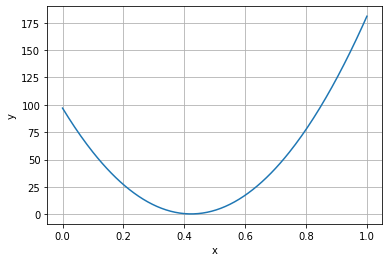

In [12]:
A = np.array([[1, 2, -1], [8, -5, 2]])
B = np.array([1, 1])

x = np.linspace(0, 1, 201)
y = 10 * x - 4
z = 21 * x - 9
plt.plot(x, Q(x, y, z))
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

Из графика видно что минимум функции находится чуть больше чем 0.4. Теперь найдем нормальное псевдорешение с помощью python.

In [13]:
np.linalg.lstsq(A, B)

/Users/spouk/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


(array([ 0.32656827,  0.26568266, -0.14206642]),
 array([], dtype=float64),
 2,
 array([9.65316119, 2.41173777]))

### Задание 6
Найдите одно из псевдорешений вырожденной системы: $\begin{bmatrix} 1 & 2 & 3 \\ 4 & 5 & 6 \\ 7 & 8 & 9 \end{bmatrix} \cdot X = \begin{bmatrix} 2 \\ 5 \\ 11 \end{bmatrix}$ с помощью QR-разложения.

Попробуйте также отыскать и нормальное псевдорешение.

Найдем матрицы $Q$ и $R$.

In [14]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
B = np.array([2, 5, 11])
Q, R = np.linalg.qr(A)
print(Q)
print(R)

[[-0.12309149  0.90453403  0.40824829]
 [-0.49236596  0.30151134 -0.81649658]
 [-0.86164044 -0.30151134  0.40824829]]
[[-8.12403840e+00 -9.60113630e+00 -1.10782342e+01]
 [ 0.00000000e+00  9.04534034e-01  1.80906807e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.11164740e-15]]


Выделим матрицы $R1$ и $B1$ из матриц $R$ и $B$ соответственно.

In [15]:
R1 = R[:2, :2]
R1

array([[-8.1240384 , -9.6011363 ],
       [ 0.        ,  0.90453403]])

In [16]:
B1 = np.dot(np.transpose(Q), B)[:2]
B1

array([-1.21860576e+01,  8.54871729e-15])

Теперь найдем вектор решения X1

In [17]:
X1 = np.linalg.solve(R1, B1)
X1

array([1.50000000e+00, 9.45096256e-15])

Получим итоговый вектор Х, добавив к вектору Х1 нулевую компоненту вектора Х2

In [18]:
X = np.append(X1, 0)
print(X)

[1.50000000e+00 9.45096256e-15 0.00000000e+00]


Мы нашли произвольное псевдорешение.